In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
import numpy as np
import pandas as pd
import warnings
import sys

sys.path.append("../src")
from margin_calibration import MarginCalibration

In [106]:
warnings.simplefilter("ignore")

# Dataset Generation

In [107]:
# Create a 100 random observations with their respective
# sampling weights, such that those weights sum to 20 %
n_obs = 100
sampling_probabilities = np.random.rand(n_obs, 1).flatten()
sampling_probabilities = sampling_probabilities / sampling_probabilities.sum() *.2

# Create a matrix of size n_obs * n_margins, with margins ranging from 0 to 1000
n_margins = 2 # Let say we have two variables
calibration_matrix = 1000*np.random.rand(n_obs, n_margins)

# Now we create the calibration target
# It is of sier n_margins * 1 and contains the 
# sums of the margins over all the population
calibration_target = np.array([np.sum(calibration_matrix[:, i])*100 for i in range(calibration_matrix.shape[1])])

# The costs should be of size of the number of margins
costs = (1,1) # We give here same costs to both variables

# Margin Calibration

In [139]:
mc=MarginCalibration()
mc_logit=MarginCalibration("logit", .5, 1.5)
mc_rr=MarginCalibration("raking_ratio")
mc_lt=MarginCalibration("truncated_linear", .5, 1.5)

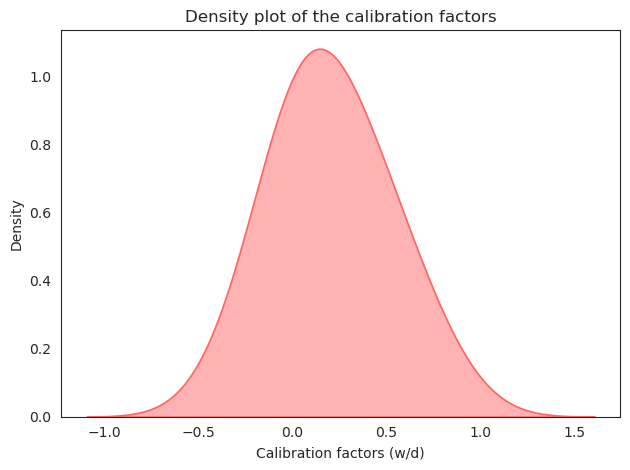

CPU times: user 7.43 s, sys: 34.8 ms, total: 7.47 s
Wall time: 432 ms


array([ 6.41994752e+02, -6.26408777e+01,  6.29858300e+01,  9.04233889e+01,
        1.38880828e+02,  1.30877144e+02,  1.66642078e+02, -6.82004996e+01,
        6.72553515e+01,  9.02524326e+01, -2.93663820e+01,  2.47540509e+02,
       -2.29068628e+00,  1.23169509e+01,  4.70911155e+01,  1.94769209e+02,
        1.48597294e+02,  2.70993116e+03, -1.66489169e+01,  1.23109492e+02,
       -3.53442874e+01, -3.02545530e+02,  1.92398923e+02,  1.72954759e+02,
        9.84235664e+02,  6.72709931e+02,  2.89789383e+01, -9.08288860e+00,
        3.44584763e+02,  8.39217548e+00,  4.81061593e+02, -3.05856989e+02,
        4.76134173e+01, -3.66500874e+01,  3.05543697e+02,  1.76347509e+02,
        5.34485582e+02, -1.45061370e+00, -1.59841305e+02, -1.27165694e+02,
        6.46486472e+01, -3.55393348e+02,  6.99994438e+01, -1.04608424e+03,
       -3.68545165e+02,  8.05957650e+01,  5.08289007e+02, -2.07646382e+02,
        9.96590619e+00,  2.91249551e+02,  3.90433789e+01,  2.12951644e+02,
        1.47067321e+02,  

In [140]:
%%time
mc.calibration(sampling_probabilities, calibration_matrix, calibration_target)

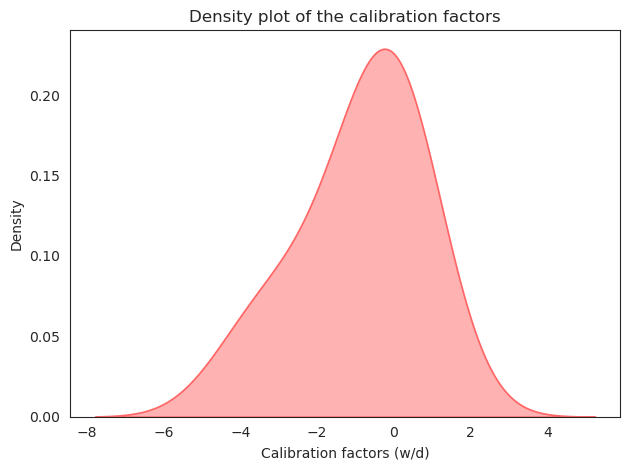

CPU times: user 1h 45min 20s, sys: 9.93 s, total: 1h 45min 30s
Wall time: 3min 31s


array([ 4.89817078e+02, -7.15316200e+02, -2.63558780e+02, -6.49101094e+02,
       -1.34520747e+02, -5.79120073e+02,  5.28282964e+00, -1.07903875e+03,
       -1.64045067e+02,  1.96063041e+02, -7.24220196e+02, -3.49956435e+02,
       -4.83593757e+02, -8.97492055e+02, -1.32213417e+03,  7.71696907e+01,
       -6.77338198e+02,  2.34632703e+04, -8.74234248e+02, -2.87393630e+02,
       -1.11965759e+03,  1.77150233e+03,  2.06101377e+02, -5.57413459e+01,
        1.56219159e+03,  1.06272768e+03, -2.61351532e+02, -1.10759944e+03,
        1.30170716e+02, -2.75679039e+02,  3.28381432e+02,  3.89621351e+03,
       -4.38592471e+02, -8.00623729e+02, -1.15488531e+01, -2.50899521e+02,
        3.41460930e+02, -1.03209838e+03, -9.79974532e+02, -1.27925398e+03,
       -2.71294295e+02, -2.46168981e+02, -1.08495491e+02,  1.37408784e+03,
        5.47289160e+03, -1.74226768e+02,  1.83726451e+03, -1.25945614e+03,
        6.72778414e+02,  3.11565122e+02, -4.86979642e+02, -4.45966884e+02,
       -5.87138104e+02,  

In [141]:
%%time
mc_logit.calibration(sampling_probabilities, calibration_matrix, calibration_target)

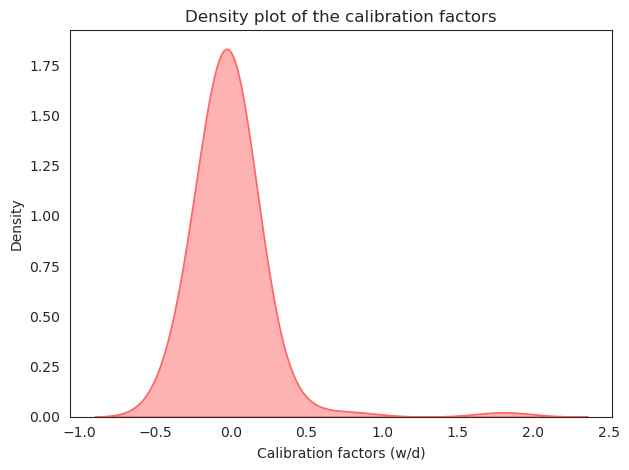

CPU times: user 37min 43s, sys: 2.09 s, total: 37min 45s
Wall time: 1min 15s


array([ 3.76982758e-01, -8.62222479e+00,  5.72396158e+00, -8.66552413e+00,
       -3.66426668e+01, -3.94627541e-01, -3.20292351e+00, -7.18353853e+01,
        1.69575030e+00,  1.06446491e+01, -4.41291336e+01, -3.19485892e+00,
       -1.93632278e+00, -4.13391247e+01, -1.09567015e+02,  6.06830338e+00,
        1.12824917e+00,  9.90847028e+03, -5.49509680e+00,  6.84300481e+00,
       -6.29065490e+01, -3.30640339e+00,  1.59552522e+02,  2.55565146e+00,
        6.88809543e+00,  1.20227980e+03,  1.79091459e+00, -6.32797100e+01,
       -5.07306348e-01,  2.05235333e+00,  8.52507756e+01, -4.06522428e+00,
       -6.62406557e+00,  5.18776785e+00,  5.31236231e-01,  3.22652242e-01,
        1.74969421e+01, -4.97210429e+01, -9.41685487e+01, -1.05845690e+02,
        2.79025709e+00, -1.30120341e+02, -6.45604930e+01, -1.16701255e+02,
        3.25506428e+01, -3.72905189e+00, -1.08471391e+02, -1.25250618e+02,
       -6.76763577e+00,  1.71909840e+01, -3.37644080e+01, -1.81149996e+00,
        7.89285973e-01,  

In [148]:
%%time
mc_rr.calibration(sampling_probabilities, calibration_matrix, calibration_target)

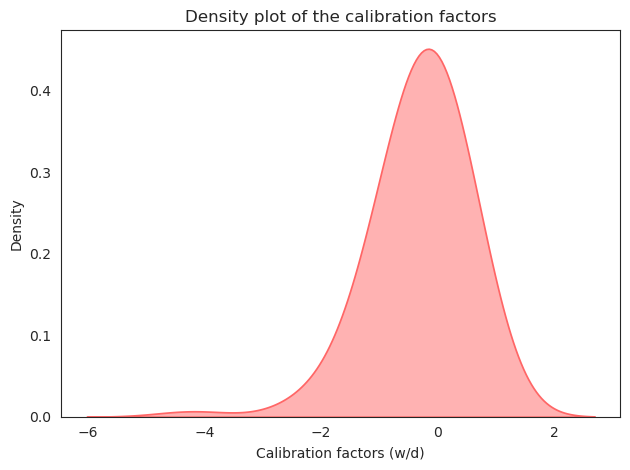

CPU times: user 2h 8min 48s, sys: 8.71 s, total: 2h 8min 56s
Wall time: 4min 18s


array([ 1.58723875e+02, -3.23229433e+02, -2.59037457e+01, -2.16981084e+02,
       -1.75848901e+02, -2.69354056e+02, -1.00113637e+02, -3.15300704e+02,
       -8.07334113e+01,  1.48047661e+02, -3.13624084e+02, -1.63626646e+02,
       -2.81092074e+02, -2.16763693e+02, -9.02744325e+02,  9.39233677e+01,
        3.19951986e+01,  1.58086655e+04, -1.98422045e+02,  3.58921904e+01,
       -1.09431972e+03, -3.48192050e+01,  2.65537024e+02,  1.43717953e+02,
        9.21130600e+02,  1.08819265e+03, -7.60330689e+01, -2.86250579e+02,
        1.48542715e+01, -8.62060619e+01,  4.76352061e+02,  2.98008541e+03,
       -9.74615706e+01, -2.26009537e+02,  1.69289822e+02,  1.09797997e+02,
        4.40366952e+02, -2.69751144e+02, -4.56125432e+02, -7.41599854e+02,
       -4.72722779e+01, -8.00606800e+02, -3.88866026e+02, -9.42838704e+01,
        4.84443387e+03, -1.35235820e+02,  3.15654400e+01, -9.11221675e+02,
       -3.30118848e+02,  3.66423735e+02, -1.80531296e+02, -4.59370764e+01,
       -1.90189057e+02,  

In [142]:
%%time
mc_lt.calibration(sampling_probabilities, calibration_matrix, calibration_target)

# Penalized Margin Calibration

In [143]:
mc_pen=MarginCalibration(penalty=.1, costs=costs)
mc_logit_pen=MarginCalibration("logit", .5, 1.5, penalty=.1, costs=costs)
mc_rr_pen=MarginCalibration("raking_ratio", penalty=.1, costs=costs)
mc_lt_pen=MarginCalibration("truncated_linear", .5, 1.5, penalty=.1, costs=costs)

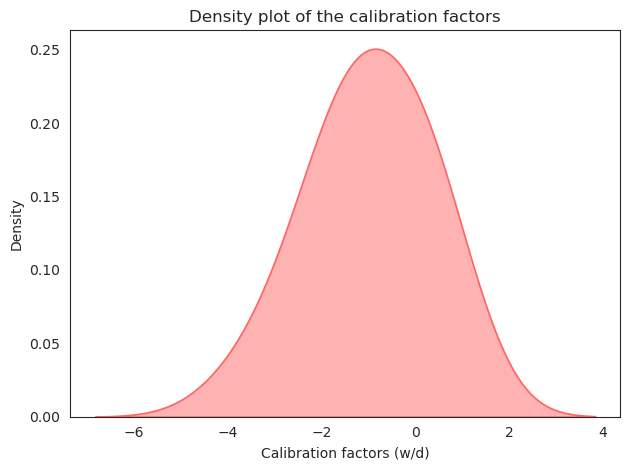

CPU times: user 6.7 s, sys: 38.6 ms, total: 6.74 s
Wall time: 439 ms


array([-2.01058342e+02, -1.32154687e+03, -2.48694878e+02, -6.11241431e+02,
       -1.12795179e+03, -5.38575598e+02, -6.81466944e+02, -5.57309921e+02,
       -5.17295540e+02,  5.98718406e+01, -1.41867714e+03, -4.95033089e+02,
       -1.19866417e+03, -4.97594929e+02, -1.65677517e+03, -2.20981814e+02,
       -7.68499696e+01,  3.46644572e+04, -3.36959723e+02, -1.07167525e+02,
       -4.03233120e+02,  8.33863254e+02,  2.63435053e+02,  6.16863216e+01,
        2.13703318e+03,  1.45336714e+03, -3.78031708e+02, -5.60546365e+02,
       -6.29681339e+02, -3.76777463e+02,  4.05192924e+02,  4.92734403e+03,
       -3.34002388e+02, -2.25234310e+02, -1.03779101e+02,  3.83827772e+01,
        2.72304313e+02, -6.17101551e+02, -1.89109905e+03, -1.70714219e+03,
       -3.20067795e+02, -1.58484655e+03, -1.21933079e+03,  7.94773128e+02,
        6.73837010e+03, -6.86796663e+02,  3.68021065e+02, -1.93475556e+03,
        1.28838171e+01,  3.95250262e+02, -6.84010683e+02, -5.06501799e+02,
       -4.02004704e+02,  

In [144]:
%%time
mc_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

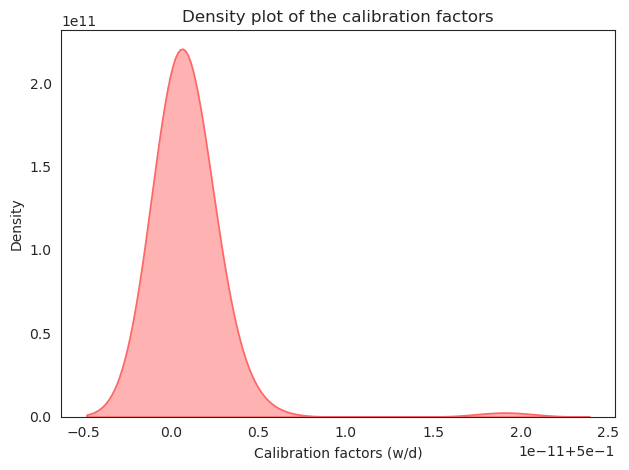

CPU times: user 7.14 s, sys: 11.6 ms, total: 7.15 s
Wall time: 862 ms


array([ 1018.7949904 ,   338.35844878,   160.00629474,   161.03319896,
         425.61288589,   157.80723684,   373.26137727,   138.83191405,
         212.14050834,   196.06288646,   364.15400587,   200.76478558,
         405.7576084 ,   143.69820745,   210.26928743,   301.3289038 ,
         138.09619639, 18913.27169843,   133.93433377,   147.85114548,
         130.26115985,  1771.49009669,   192.82841705,   152.59743591,
        1557.05656896,   765.66594436,   170.76719754,   139.4089952 ,
         460.06359786,   168.63211718,   328.21985306,  3867.31039226,
         149.47366841,   128.59834853,   208.51135901,   139.14654431,
         341.42746523,   146.24614851,   375.20294763,   218.45425073,
         165.34277423,   955.79921606,   911.54138272,  2087.36495761,
        5471.60267102,   248.25999089,  1837.26315849,   252.680389  ,
        1220.57543907,   497.1922944 ,   184.06022057,   222.03612175,
         152.96698265,  1686.11143517,   142.93572669,   184.49883891,
      

In [145]:
%%time
mc_logit_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

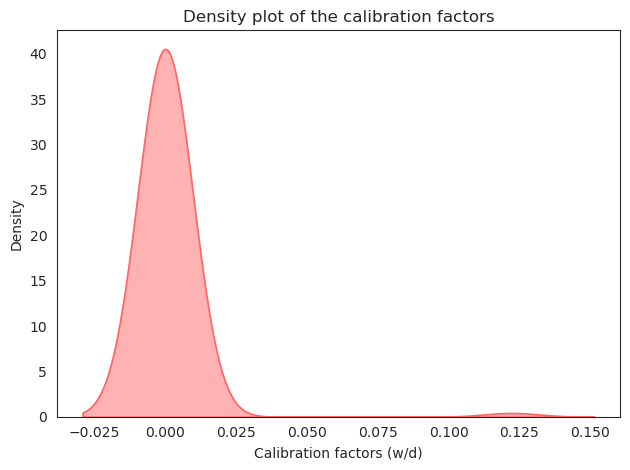

CPU times: user 7.91 s, sys: 20 ms, total: 7.93 s
Wall time: 1.1 s


array([3.12191099e-05, 2.00550214e-05, 2.78359078e-05, 2.91609289e-05,
       2.57386341e-05, 3.50307156e-05, 2.83485449e-05, 1.52590256e-05,
       2.64448601e-05, 3.04411661e-05, 2.08781953e-05, 5.17144734e-05,
       2.18302332e-05, 2.24285424e-05, 2.28562407e-05, 3.34194471e-05,
       4.63570800e-05, 4.62450963e+03, 2.05139153e-05, 3.78651234e-05,
       1.88883120e-05, 2.05904627e-05, 4.76606789e-05, 5.23134807e-05,
       3.42439481e-05, 4.37855953e-05, 2.44389894e-05, 2.05752383e-05,
       3.43681971e-05, 2.30190993e-05, 8.76089529e-05, 2.14796871e-05,
       2.60816749e-05, 1.93736127e-05, 7.80636829e-05, 5.97525228e-05,
       9.87404383e-05, 2.12265353e-05, 1.78131524e-05, 1.65652665e-05,
       2.76229597e-05, 1.78183531e-05, 2.23625476e-05, 1.77570687e-05,
       2.08057430e-05, 2.63532444e-05, 2.46839890e-05, 1.53014974e-05,
       2.21053533e-05, 3.31771392e-05, 2.43606874e-05, 4.08635128e-05,
       3.95095623e-05, 5.17583630e-05, 1.85043214e-05, 3.09044234e-05,
      

In [146]:
%%time
mc_rr_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

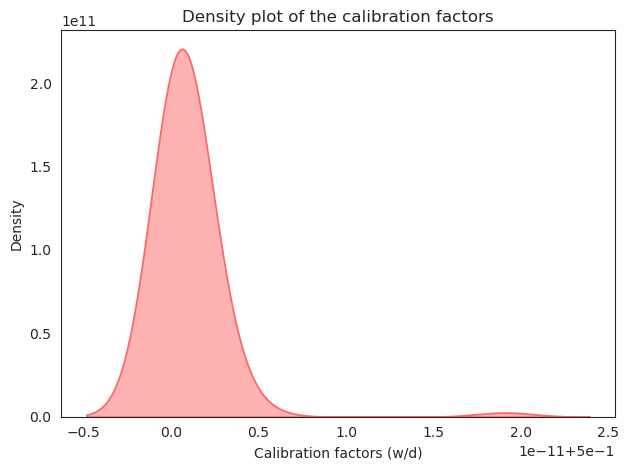

CPU times: user 7.14 s, sys: 15.9 ms, total: 7.16 s
Wall time: 846 ms


array([ 1018.7949904 ,   338.35844878,   160.00629474,   161.03319896,
         425.61288589,   157.80723684,   373.26137727,   138.83191405,
         212.14050834,   196.06288646,   364.15400587,   200.76478558,
         405.7576084 ,   143.69820745,   210.26928743,   301.3289038 ,
         138.09619639, 18913.27169843,   133.93433377,   147.85114548,
         130.26115985,  1771.49009669,   192.82841705,   152.59743591,
        1557.05656896,   765.66594436,   170.76719754,   139.4089952 ,
         460.06359786,   168.63211718,   328.21985306,  3867.31039226,
         149.47366841,   128.59834853,   208.51135901,   139.14654431,
         341.42746523,   146.24614851,   375.20294763,   218.45425073,
         165.34277423,   955.79921606,   911.54138272,  2087.36495761,
        5471.60267102,   248.25999089,  1837.26315849,   252.680389  ,
        1220.57543907,   497.1922944 ,   184.06022057,   222.03612175,
         152.96698265,  1686.11143517,   142.93572669,   184.49883891,
      

In [147]:
%%time
mc_lt_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)